<a href="https://colab.research.google.com/github/Katrill/PM2.5/blob/main/model_PM2.5_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание датасета

Присутствующие в атмосфере аэрозоли оказывают влияние на физико-химические характеристики воздуха (плотность, оптическая прозрачность и др.) и на его пригодность для дыхания и использования в технологических процессах. Высокая степень загрязненности воздуха в больших городах связана с большим количеством автомобильного транспорта и заводов, являющихся основными источниками выбросов первичных частиц-поллютантов, которые служат ядрами для дальнейшего формирования вторичных частиц и их дальнешего роста. В связи с этим актуальна задача прогноза количества частиц (в частности, PM2.5 - частицы вещества диаметром менее 2.5 мкм) в воздухе в зависимости, например, от погодных условий (температура, влажность, осадки). Так как метеорологическим явлениям свойственны циклические изменения в течение года и суток (например, суточные колебания температуры, направления ветра, превалирующие в данной местности в разные времена года), то при прогнозе стоит также рассматривать временные показатели (месяц, день, час).

***Задача:*** спрогнозировать концентрацию  PM2.5 в зависимости от времени года, суток и метеорологических условий.

Выбранный датасет содержит результаты измерений PM2.5, проводимых посольством США в Пекине, и метеорологические данные наблюдений Пекинского Международного Аэропорта. В датасете 43824 строки и 13 колонок. Датасет предназначен для EDA, визуализации данных и анализа с применением техники регрессии.
Столбцы:
*   No: номер строки;
*   Year: год;
*   Month: месяц;
*   Day: день;
*   Hour: час;
*   PM2.5: концентрация частиц (мкг/м3);
*   DEWP: точка росы (°С) - температура воздуха, при которой содержащийся в нём пар достигает состояния насыщения и начинает конденсироваться;
*   TEMP: температура (°С);
*   PRES: давление  (кПа);
*   cbwd: комбинированное направление воздуха, 4 категории. NW включает W, WNW, NW, NNW and N; NE - NNE, NE, ENE; SE - E, ESE, SE, SSE, S; SW - SSW, SW, WSW; CV - безветрие и переменчивый. Объединение E с SE и W с NW вызвано расположением основных загрязняющих предприятий Пекина;
*   Iws: кумулятивная скорость ветра (м/с);
*   Is: кумулятивное количество часов, когда шел снег;
*   Ir: кумулятивное количество часов, когда шел дождь.

Датасет взят из the Machine Learning Repository of University of California, Irvine Beijing PM2.5 Data Set (UC Irvine). The UCI page mentions the following publication as the original source of the data set: Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H. and Chen, S. X. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257.

# Pycaret

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
import pandas as pd
df_caret = pd.read_csv("https://drive.google.com/uc?id=1mbsOpyv1L1wR93k7lGLfJCHsbUbYmBaI", encoding='cp1251')

In [ ]:
df_caret.dropna(axis=0, how="any", inplace=True)
df_caret.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
data = df_caret.sample(frac=0.95, random_state=1)
data_unseen = df_caret.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (39669, 13)
Unseen Data For Predictions: (2088, 13)


In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'pm2.5', session_id=123,
                   categorical_features=['cbwd'],
                   numeric_features=['month'],
                   ignore_features= ['No', 'year'],
                   # remove_multicollinearity= True, 
                   feature_selection= True,
                   # fold= 10,
                   # normalize = True,
                   # transform_target = True, remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                   transformation=  True,
                   profile= False)

,Description,Value
0,session_id,123
1,Target,pm2.5
2,Original Data,"(39669, 13)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(27768, 12)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['cbwd'],
                                      display_types=True,
                                      features_todrop=['No', 'year'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['month'],
                                      target='pm2.5', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical...
                ('dummy', Dummify(target='pm2.5')),
                ('fix_perfect', Remove_100(target='pm2.5')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select',
    

In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,27.4434,1854.3995,43.0386,0.7821,0.5083,0.5419,9.363
et,Extra Trees Regressor,28.3269,1949.6692,44.1349,0.7709,0.5186,0.5622,7.120
lightgbm,Light Gradient Boosting Machine,36.3566,2799.7709,52.8991,0.6710,0.6175,0.7245,0.342
dt,Decision Tree Regressor,34.9014,3816.8446,61.7335,0.5506,0.6515,0.6050,0.171
knn,K Neighbors Regressor,42.1482,4090.2134,63.9376,0.5196,0.6607,0.8051,1.955
gbr,Gradient Boosting Regressor,45.4211,4151.2382,64.4143,0.5126,0.7549,0.9799,2.320
lr,Linear Regression,56.9673,6218.5312,78.8381,0.2700,0.8979,1.3111,0.385
ridge,Ridge Regression,56.9666,6218.5304,78.8381,0.2700,0.8979,1.3111,0.029
br,Bayesian Ridge,56.9627,6218.5327,78.8381,0.2700,0.8979,1.3110,0.026
lasso,Lasso Regression,57.0511,6264.1608,79.1262,0.2647,0.9024,1.3335,0.026


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


# Lightgbm

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36.2965,2757.1915,52.5090,0.6681,0.5964,0.6826
1,36.5211,2715.8626,52.1139,0.6771,0.6181,0.7150
2,35.0544,2532.8822,50.3277,0.7086,0.6132,0.7147
3,36.5059,2801.5002,52.9292,0.6653,0.6427,0.7919
4,36.1116,2871.5016,53.5864,0.6523,0.6156,0.7136
5,36.1855,2983.7834,54.6240,0.6806,0.6144,0.7047
6,37.0889,2972.6872,54.5224,0.6612,0.6143,0.7169
7,37.0576,2737.5115,52.3212,0.6671,0.6231,0.7614
8,36.4245,2750.6583,52.4467,0.6628,0.6204,0.7266


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36.1332,2672.9441,51.7005,0.6783,0.6412,0.6761
1,34.9026,2492.7241,49.9272,0.7036,0.6495,0.6956
2,34.7236,2461.2770,49.6113,0.7168,0.6526,0.7129
3,36.0271,2656.1759,51.5381,0.6826,0.6917,0.7830
4,36.1955,2783.4539,52.7584,0.6630,0.6431,0.7263
5,36.0643,2950.7031,54.3204,0.6841,0.6546,0.7038
6,36.6285,2830.7218,53.2045,0.6774,0.6515,0.6988
7,36.6136,2686.6229,51.8326,0.6733,0.6493,0.7245
8,35.6975,2590.3739,50.8957,0.6824,0.6583,0.7221


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


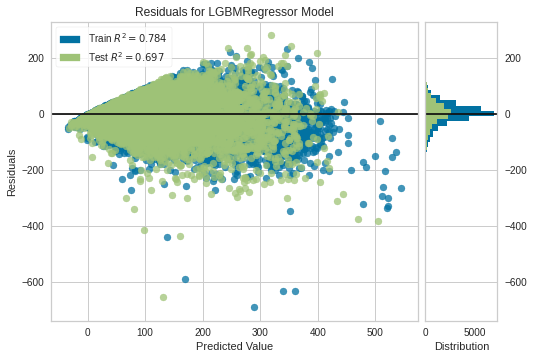

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm)

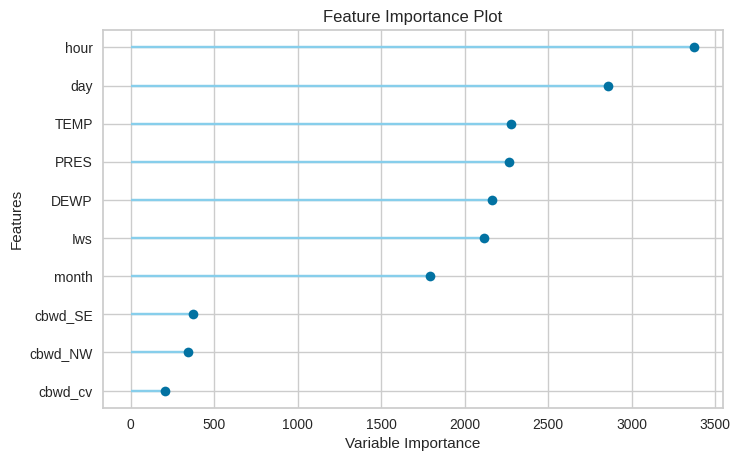

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_

In [ ]:
#Делаем предсказание на 5% данных, не участвовавших в машинном обучении
new_prediction = predict_model(final_lightgbm, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,33.3443,2203.204,46.9383,0.7258,0.6201,0.6524


In [ ]:
#Сохраняем нашу модель
save_model(final_lightgbm,'final_lightgbm')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=final_lightgbm, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['cbwd'],
                                      display_types=True,
                                      features_todrop=['No', 'year'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_fe

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['cbwd'],
                                       display_types=True,
                                       features_todrop=['No', 'year'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['month'],
                                       target='pm2.5', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=41,
              

In [ ]:
#Снова загружаем сохраненную модель
saved_lightgbm = load_model('final_lightgbm')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=final_lightgbm, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
#Убеждаемся в идентичности новых предсказаний по сохраненной модели
new_prediction = predict_model(saved_lightgbm, data=data_unseen)
new_prediction.to_excel('new_predictions.xls')
new_prediction.head(10)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['cbwd'],
                                      display_types=True,
                                      features_todrop=['No', 'year'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['month'],
                                      target='pm2.5', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical...
                               boosting_type='gbdt', class_weight=None,
                               colsample_bytree=1.0, feature_fraction=0.4,
                               importance_type='split', learning_rate=0.1,
                        

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,33.3443,2203.204,46.9383,0.7258,0.6201,0.6524


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Label
0,40,2010,1,2,15,154.0,-9,-5.0,1025.0,SE,35.75,0,0,98.553533
1,43,2010,1,2,18,170.0,-8,-5.0,1027.0,SE,42.46,0,0,135.394500
2,45,2010,1,2,20,154.0,-7,-5.0,1028.0,SE,46.04,0,0,172.372993
3,52,2010,1,3,3,55.0,-8,-7.0,1025.0,SE,68.84,7,0,95.401803
4,67,2010,1,3,18,61.0,-11,-9.0,1021.0,cv,0.89,24,0,194.748392
5,77,2010,1,4,4,28.0,-19,-11.0,1025.0,NW,48.72,0,0,19.727711
6,86,2010,1,4,13,32.0,-20,-10.0,1030.0,NW,127.38,0,0,28.095786
7,139,2010,1,6,18,96.0,-22,-9.0,1033.0,NW,5.37,0,0,57.724794
8,173,2010,1,8,4,110.0,-18,-15.0,1030.0,cv,0.45,0,0,154.098863
9,198,2010,1,9,5,155.0,-19,-16.0,1027.0,NW,13.86,0,0,76.788659


# Итоги
Изучены разные методы ML. Для выбранного датасета отдельные линейная регрессия и дерево решений показали низкую точность (R2 < 0.3). Такую же низкую точность продемонстрировали AdaBoost SGDregressor. XGBoost и CatBoost показали средние результаты (0,9-0,56), вероятно можно добиться лучшего результата, настраивая гиперпараметры, о чем говорит то, что при предварительной оценке CatBoost в Pycaret точность метода получилась выше (0,7118). RandomForest и Bagging показали лучшие результаты (R2 около 0,8) как отдельно, так и с помощью PyCaret (RF). 
Pycaret также наиболее высокие результаты по предварительной оценке точности методов получил с помощью RandomForest (0,7821).

***Точность*** моделей, полученных разными методами (R2):


1.   линейная регрессия 0,2724
2.   дерево решений 0,2653
1.   Bagging 0.7941
2.   RandomForest 0.8003
1.   AdaBoost 0.3056
2.   SGDRegressor 0.2726
1.   XGBoost 0.3984
1.   CatBoost 0.5639
2.   Pycaret(LightGBM) 0.7258










